In [909]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from gtda.pipeline import Pipeline
from gtda.time_series import Resampler
from gtda.diagrams import PersistenceEntropy, Scaler, HeatKernel, BettiCurve
import numpy as np
from gtda.time_series import SingleTakensEmbedding, takens_embedding_optimal_parameters, TakensEmbedding
from sklearn.decomposition import PCA
from gtda.plotting import plot_point_cloud
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import PersistenceImage

from gtda.metaestimators import CollectionTransformer
from sklearn import metrics 

In this notebook we compute persistence images for normal, slugging and unstable flow time series (WHP) and then classify them via linear classifier methods. 

In [910]:
def read_files(path, label, limit):
    data = []
    os.chdir(path)
    i = 0
    for file in os.listdir():
        data_df = pd.read_csv(file)
        # fill NaN with an interpolated value
        data_df = data_df.interpolate()
        period = int(len(data_df)/limit)
        periodicSampler = Resampler(period=period)
        print(i,file)
        # resample the files to that all of them are the same length (in entries)
        # NOTE: timestamps are omitted and timesteps are going to be different for each resampled time series!
        index_sampled, signal_sampled = periodicSampler.fit_transform_resample(data_df.index, data_df[label])
        data.append(signal_sampled)
        i += 1
    data_T = list(map(list, zip(*data)))
    data = np.array(data_T)
    df = pd.DataFrame.from_records(data_T)
    return data.T, df

Reading the slugging data first and converting them to Bar

In [911]:
slugging_signals, slugging_df = read_files("/Users/simo/repos/RareEventsDataset/3w_dataset-master/data/data/3/ALL/", "P-TPT",3000)

0 SIMULATED_00035.csv
1 SIMULATED_00021.csv
2 SIMULATED_00009.csv
3 WELL-00014_20170921200114.csv
4 WELL-00014_20170925160218.csv
5 WELL-00014_20170926170228.csv
6 SIMULATED_00008.csv
7 SIMULATED_00020.csv
8 SIMULATED_00034.csv
9 SIMULATED_00022.csv
10 WELL-00014_20170920010042.csv
11 SIMULATED_00036.csv
12 WELL-00014_20170920060228.csv
13 WELL-00014_20170921050404.csv
14 SIMULATED_00037.csv
15 SIMULATED_00023.csv
16 WELL-00014_20170921100155.csv
17 SIMULATED_00027.csv
18 WELL-00001_20170320130025.csv
19 WELL-00014_20170920110053.csv
20 SIMULATED_00033.csv
21 WELL-00014_20170922060124.csv
22 SIMULATED_00032.csv
23 SIMULATED_00026.csv
24 SIMULATED_00018.csv
25 SIMULATED_00030.csv
26 SIMULATED_00024.csv
27 WELL-00014_20170926020340.csv
28 WELL-00014_20171028130000.csv
29 SIMULATED_00025.csv
30 SIMULATED_00031.csv
31 SIMULATED_00019.csv
32 SIMULATED_00056.csv
33 SIMULATED_00042.csv
34 WELL-00014_20170925210042.csv
35 WELL-00014_20171028080000.csv
36 SIMULATED_00043.csv
37 SIMULATED_00057.

In [912]:
PatoBar = 1/100000
slugging_df = slugging_df.apply(lambda x: x*PatoBar) 
slugging_signals = slugging_signals * PatoBar

Compute persistence images for slug flow

In [913]:
Per_images_slugging = topological_transfomer.fit_transform(slugging_signals)

Reading now the normal operation data 

In [914]:
normal_signals, normal_df = read_files("/Users/simo/repos/RareEventsDataset/3w_dataset-master/data/data/0/", "P-TPT",3000)

0 WELL-00002_20170625220127.csv
1 WELL-00008_20170611080445.csv
2 WELL-00002_20170810020026.csv
3 WELL-00007_20170801180000.csv
4 WELL-00002_20170612110022.csv
5 WELL-00001_20170527160000.csv
6 WELL-00001_20170527060000.csv
7 WELL-00005_20170812170000.csv
8 WELL-00008_20170703060123.csv
9 WELL-00006_20170828140031.csv
10 WELL-00006_20170209000114.csv
11 WELL-00008_20170612140047.csv
12 WELL-00005_20170814200000.csv
13 WELL-00002_20170623150127.csv
14 WELL-00002_20170620140116.csv
15 WELL-00002_20170613070011.csv
16 WELL-00002_20170621180032.csv
17 WELL-00005_20170815050000.csv
18 WELL-00002_20170621030054.csv
19 WELL-00006_20170207080124.csv
20 WELL-00002_20170218210134.csv
21 WELL-00002_20170214220322.csv
22 WELL-00006_20170508090031.csv
23 WELL-00002_20170621080422.csv
24 WELL-00002_20170625170232.csv
25 WELL-00008_20170612190111.csv
26 WELL-00001_20170219070031.csv
27 WELL-00002_20170210230203.csv
28 WELL-00008_20170702050135.csv
29 WELL-00002_20170804210000.csv
30 WELL-00005_201708

247 WELL-00002_20170614080057.csv
248 WELL-00002_20170612210000.csv
249 WELL-00002_20170619030032.csv
250 WELL-00002_20170213060225.csv
251 WELL-00006_20170815160000.csv
252 WELL-00006_20170815060000.csv
253 WELL-00002_20170618070105.csv
254 WELL-00006_20170817080000.csv
255 WELL-00006_20170817180000.csv
256 WELL-00002_20170617220127.csv
257 WELL-00006_20170819050000.csv
258 WELL-00006_20170819150000.csv
259 WELL-00006_20170209100207.csv
260 WELL-00001_20170425040207.csv
261 WELL-00001_20170201020207.csv
262 WELL-00002_20131211230015.csv
263 WELL-00006_20170224020000.csv
264 WELL-00006_20170826220114.csv
265 WELL-00001_20170823150000.csv
266 WELL-00001_20170823050000.csv
267 WELL-00001_20170523120000.csv
268 WELL-00001_20170218060218.csv
269 WELL-00005_20170813200000.csv
270 WELL-00002_20170625070243.csv
271 WELL-00003_20170514010000.csv
272 WELL-00005_20170815170000.csv
273 WELL-00003_20170514110000.csv
274 WELL-00006_20170507030249.csv
275 WELL-00008_20170611130123.csv
276 WELL-00006

491 WELL-00002_20170406050000.csv
492 WELL-00002_20170406150000.csv
493 WELL-00001_20170201170311.csv
494 WELL-00002_20170217200225.csv
495 WELL-00003_20170820230053.csv
496 WELL-00008_20170817100246.csv
497 WELL-00002_20170808100000.csv
498 WELL-00006_20170506120042.csv
499 WELL-00002_20170808000000.csv
500 WELL-00002_20170307200031.csv
501 WELL-00001_20170523220000.csv
502 WELL-00005_20170816230000.csv
503 WELL-00002_20170219120152.csv
504 WELL-00002_20170618120600.csv
505 WELL-00008_20170611230123.csv
506 WELL-00005_20170830210000.csv
507 WELL-00002_20170809160026.csv
508 WELL-00006_20170509150042.csv
509 WELL-00006_20170222050000.csv
510 WELL-00006_20170222150000.csv
511 WELL-00002_20170621130116.csv
512 WELL-00001_20170825120000.csv
513 WELL-00001_20170825020000.csv
514 WELL-00006_20170827080114.csv
515 WELL-00006_20170821120000.csv
516 WELL-00001_20170528220000.csv
517 WELL-00006_20170821020000.csv
518 WELL-00002_20170310030146.csv
519 WELL-00008_20170819120210.csv
520 WELL-00002

In [915]:
normal_df = normal_df.apply(lambda x: x*PatoBar) 
normal_signals = normal_signals * PatoBar

In [916]:
embedding_dimension = 9
embedding_time_delay = 85
stride = 3

embedder = TakensEmbedding(time_delay=embedding_time_delay,
                           dimension=embedding_dimension,
                           stride=stride)
batch_pca =  CollectionTransformer(PCA(n_components=3),n_jobs=-1)
persistence = VietorisRipsPersistence(homology_dimensions=[0, 1], n_jobs=None) 
#image = PersistenceImage(n_bins=500, sigma=0.5)
image = PersistenceImage(n_bins=100, sigma=1.0)

steps = [
         ("embedder", embedder),
         ("persistence", persistence),
         ("image", image)
        ]
topological_transfomer = Pipeline(steps)

Compute Persistence images for normal signals.

In [917]:
Per_images_normal = topological_transfomer.fit_transform(normal_signals)

In [918]:
from gtda.plotting import plot_heatmap
Per_images_normal.shape

(597, 2, 100, 100)

As ane example we display now one set of persistence images for severe slugging.

In [919]:
slug_signal = pippo.T
embedding_dimension = 9
embedding_time_delay = 85
stride = 3

embedder = TakensEmbedding(time_delay=embedding_time_delay,
                           dimension=embedding_dimension,
                           stride=stride)

y_slug_embedded = embedder.fit_transform(slug_signal)
y_slug_embedded = y_slug_embedded[0]
pca = PCA(n_components=3)
y_slug_embedded_pca = pca.fit_transform(y_slug_embedded)

plot_point_cloud(y_slug_embedded_pca)

In [920]:
homology_dimensions = (0,1)
VRP = VietorisRipsPersistence(homology_dimensions=homology_dimensions)
PerDiagram_cosx = VRP.fit_transform_plot(y_slug_embedded[None,:,:])

In [922]:
plot_heatmap(Per_images_slugging[96,0], colorscale='plotly3', origin='upper', title=None, plotly_params=None)

In [995]:
data = Per_images_slugging[96,0][45:100]
data = data[:,0:55]
fig = go.Figure(data =
     go.Contour(z = data, colorscale='plotly3'))
fig.update_yaxes( scaleanchor = "x", scaleratio = 1, )

fig.write_image("/Users/simo/repos/TDA-for-Slugging/images/PersImg_H0.pdf")
fig.show()

In [994]:
data = Per_images_slugging[96,1][45:100]
data = data[:,0:55]
fig = go.Figure(data =
     go.Contour(z = data, colorscale='plotly3'))

fig.update_yaxes( scaleanchor = "x", scaleratio = 1, )

fig.write_image("/Users/simo/repos/TDA-for-Slugging/images/PersImg_H1.pdf")
fig.show()

Adding labels to the persistent images. 
- 0: Normal Operation
- 1: Severe Slugging

In [564]:
labels_normal = np.zeros(len(Per_images_normal))
labels_slugging = np.ones(len(Per_images_slugging))
labels = np.append(labels_normal, labels_slugging)
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [907]:
Per_images_normal_H1 =  Per_images_normal[:,1,:,:]
Per_images_slugging_H1 =  Per_images_slugging[:,1,:,:]
Per_images_normal_H0 =  Per_images_normal[:,0,:,:]
Per_images_slugging_H0 =  Per_images_slugging[:,0,:,:]

imgs_array_normalH0 = np.array([img.flatten() for img in Per_images_normal_H0])
imgs_array_sluggingH0 = np.array([img.flatten() for img in Per_images_slugging_H0])
imgs_array_normalH1 = np.array([img.flatten() for img in Per_images_normal_H1])
imgs_array_sluggingH1 = np.array([img.flatten() for img in Per_images_slugging_H1])

In [566]:
imgs_array_H0 = np.vstack([imgs_array_normalH0, imgs_array_sluggingH0])
imgs_array_H1 = np.vstack([imgs_array_normalH1, imgs_array_sluggingH1])

Now perform a logistic regression classifier for only the 2 labels (Normal and Slugging) on an array of perisitence images for H0 and H1.

In [567]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_trainH0, X_testH0, y_trainH0, y_testH0 = train_test_split(imgs_array_H0, labels, test_size=0.35, random_state=242)
X_trainH1, X_testH1, y_trainH1, y_testH1 = train_test_split(imgs_array_H1, labels, test_size=0.35, random_state=153)

In [568]:
lr = LogisticRegression()
lr.fit(X_trainH0, y_trainH0)
lr.score(X_testH0, y_testH0)

1.0

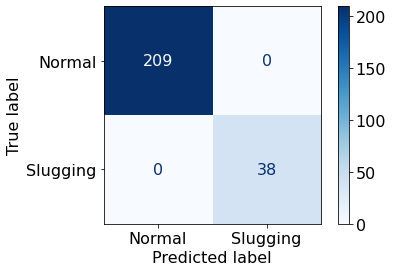

In [569]:
y_pred=lr.predict(X_testH0)
ft_index=['Normal', 'Slugging']
plt.rcParams.update({'font.size': 16})
cm = metrics.confusion_matrix(y_testH0, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ft_index)
disp.plot(cmap='Blues')

In [570]:
lr.fit(X_trainH1, y_trainH1)
lr.score(X_testH1, y_testH1)

0.979757085020243

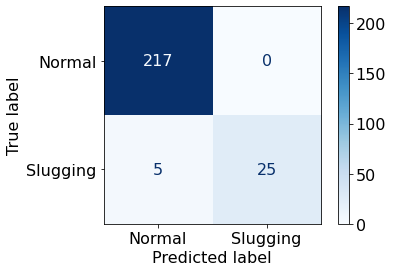

In [571]:
y_pred=lr.predict(X_testH1)
ft_index=['Normal', 'Slugging']
plt.rcParams.update({'font.size': 16})
cm = metrics.confusion_matrix(y_testH1, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ft_index)
disp.plot(cmap='Blues')

The logistic regression is very accurate: 100% accuracy for H$_0$ and 98% for H$_1$ in a binary model (normal vs. slugging). We try now adding a thirs state, the minor instability.

In [247]:
unstable_signals, unstable_df = read_files("/Users/simo/repos/RareEventsDataset/3w_dataset-master/data/data/4/", "P-TPT",3000)

0 WELL-00002_20140126140124.csv
1 WELL-00010_20180427020029.csv
2 WELL-00010_20180425080141.csv
3 WELL-00010_20180425100033.csv
4 WELL-00010_20180423220016.csv
5 WELL-00010_20180422200158.csv
6 WELL-00002_20140122020051.csv
7 WELL-00010_20180426040033.csv
8 WELL-00005_20170625133000.csv
9 WELL-00002_20140126060141.csv
10 WELL-00004_20140806100103.csv
11 WELL-00010_20180424060029.csv
12 WELL-00001_20170317000000.csv
13 WELL-00001_20170317100000.csv
14 WELL-00002_20131215160122.csv
15 WELL-00002_20140122140015.csv
16 WELL-00004_20140805020033.csv
17 WELL-00002_20131215080015.csv
18 WELL-00002_20140126160008.csv
19 WELL-00005_20170626150141.csv
20 WELL-00002_20140126000059.csv
21 WELL-00002_20140124080020.csv
22 WELL-00002_20140123020219.csv
23 WELL-00002_20140125200016.csv
24 WELL-00010_20180427200340.csv
25 WELL-00005_20170626170050.csv
26 WELL-00002_20140126040133.csv
27 WELL-00001_20170319180033.csv
28 WELL-00010_20180425000232.csv
29 WELL-00002_20140119200132.csv
30 WELL-00010_201804

249 WELL-00001_20170626080000.csv
250 WELL-00001_20170318080000.csv
251 WELL-00002_20140120000030.csv
252 WELL-00005_20170626090055.csv
253 WELL-00002_20131215120025.csv
254 WELL-00002_20140122100112.csv
255 WELL-00010_20180423200021.csv
256 WELL-00002_20140124160018.csv
257 WELL-00002_20140122040046.csv
258 WELL-00010_20180428100116.csv
259 WELL-00004_20140805040025.csv
260 WELL-00002_20140115180036.csv
261 WELL-00002_20140109050025.csv
262 WELL-00001_20170317200000.csv
263 WELL-00010_20180428020211.csv
264 WELL-00002_20140125060245.csv
265 WELL-00007_20170518130103.csv
266 WELL-00010_20180416200008.csv
267 WELL-00010_20180428060033.csv
268 WELL-00007_20170518010012.csv
269 WELL-00002_20140124140041.csv
270 WELL-00005_20170624020016.csv
271 WELL-00001_20170317040000.csv
272 WELL-00005_20170625000038.csv
273 WELL-00002_20140119160112.csv
274 WELL-00002_20140119220015.csv
275 WELL-00004_20141117230046.csv
276 WELL-00004_20141117130029.csv
277 WELL-00010_20180423040021.csv
278 WELL-00001

In [248]:
PatoBar = 1/100000
unstable_df = unstable_df.apply(lambda x: x*PatoBar) 
unstable_signals = unstable_signals * PatoBar

In [255]:
embedding_time_delay = 125
stride = 3

embedder = TakensEmbedding(time_delay=embedding_time_delay,
                           dimension=embedding_dimension,
                           stride=stride)
batch_pca =  CollectionTransformer(PCA(n_components=3),n_jobs=-1)
persistence = VietorisRipsPersistence(homology_dimensions=[0, 1], n_jobs=None) 
#image = PersistenceImage(n_bins=500, sigma=0.5)
image = PersistenceImage(n_bins=100, sigma=1.)

steps = [
         ("embedder", embedder),
         ("persistence", persistence),
         ("image", image)
        ]
topological_transfomer = Pipeline(steps)

In [256]:
Per_images_unstable = topological_transfomer.fit_transform(unstable_signals)

In [381]:
labels_unstable = np.full(len(Per_images_unstable),2)
labels_total = np.append(labels, labels_unstable)
labels.shape

(703,)

In [587]:
Per_images_unstable_H0 =  Per_images_unstable[:,0,:,:]
Per_images_unstable_H1 =  Per_images_unstable[:,1,:,:]

imgs_array_unstableH0 = np.array([img.flatten() for img in Per_images_unstable_H0])
imgs_array_unstableH1 = np.array([img.flatten() for img in Per_images_unstable_H1])

In [588]:
imgs_array_H0 = np.vstack([imgs_array_H0, imgs_array_unstableH0])
imgs_array_H1 = np.vstack([imgs_array_H1, imgs_array_unstableH1])

In [589]:
imgs_array_H0.shape

(1047, 10000)

In [590]:
imgs_array_H1.shape

(1047, 10000)

In [591]:
labels_total.shape

(1047,)

In [649]:
X_trainH0, X_testH0, y_trainH0, y_testH0 = train_test_split(imgs_array_H0, labels_total, test_size=0.35, random_state=242)
X_trainH1, X_testH1, y_trainH1, y_testH1 = train_test_split(imgs_array_H1, labels_total, test_size=0.35, random_state=153)

In [650]:
zero = 0 
one = 0 
two = 0

for item in y_trainH1:
    if item == 0:
        zero += 1
    elif item == 1:
        one += 1
    else :
        two += 1
print("TRAINING SET Total:", len(y_trainH1),"/ Normal:",zero,"Slugging:",one,"Unstable",two)

zero = 0 
one = 0 
two = 0
       
for item in y_testH1:
    if item == 0:
        zero += 1
    elif item == 1:
        one += 1
    else :
        two += 1
print("TEST SET Total:", len(y_testH1),"/ Normal:",zero,"Slugging:",one,"Unstable",two)

TRAINING SET Total: 680 / Normal: 390 Slugging: 65 Unstable 225
TEST SET Total: 367 / Normal: 207 Slugging: 41 Unstable 119


#### Logistic Regression for Persistence Images of H$_0$:

In [651]:
lr = LogisticRegression(multi_class="multinomial")
lr.fit(X_trainH0, y_trainH0)
lr.score(X_testH0, y_testH0)

/Users/simo/Documents/Projects/TDA/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.9945504087193461

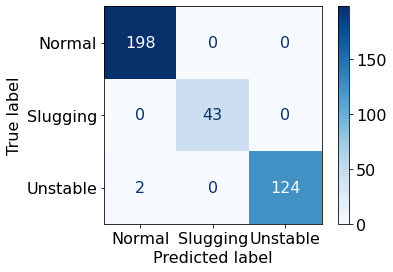

In [652]:
y_pred=lr.predict(X_testH0)
ft_index=['Normal', 'Slugging', 'Unstable']
plt.rcParams.update({'font.size': 16})
cm = metrics.confusion_matrix(y_testH0, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ft_index)
disp.plot(cmap='Blues')
plt.savefig("CM_LR_PIH0.png", dpi=300) 

In [653]:
recall = metrics.recall_score(y_testH0, y_pred, average='macro')
precision = metrics.precision_score(y_testH0, y_pred, average='macro')
f1 = metrics.f1_score(y_testH0, y_pred, average='macro')
print('Recall:', recall,'Precision:', precision ,'F1:',f1)

Recall: 0.9947089947089948 Precision: 0.9966666666666667 F1: 0.9956582914572865


In [654]:
#coef0 = lr.coef_[0].reshape([500,500])
#coef1 = lr.coef_[1].reshape([500,500])
#coef2 = lr.coef_[2].reshape([500,500])
coef0 = lr.coef_[0].reshape([100,100])
coef1 = lr.coef_[1].reshape([100,100])
coef2 = lr.coef_[2].reshape([100,100])

coef_array = np.stack((coef0,coef1,coef2), axis=0)
coef_array.shape

(3, 100, 100)

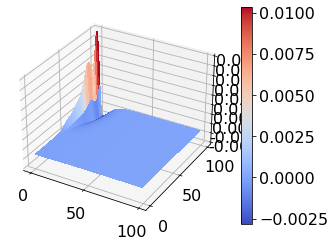

In [655]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(0, 100, 1)
Y = np.arange(0, 100, 1)
X, Y = np.meshgrid(X, Y)
#Z = Per_images_slugging[88,1,:,:]
#Z = coef_array[2]+coef_array[1]+coef_array[0]*1000
Z = coef_array[1]

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap='coolwarm',
                       linewidth=0, antialiased=False)

# Customize the axes.
ax.zaxis.set_major_locator(LinearLocator(10))

# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf)#, shrink=0.5, aspect=5)


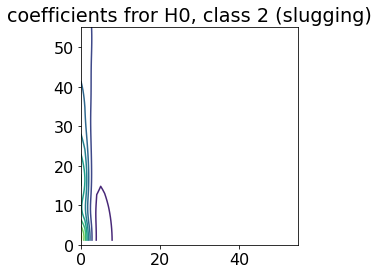

In [656]:
fig, ax = plt.subplots()
Z = coef_array[1]
CS = ax.contour(X, 100-Y, Z)

ax.axis('square')
ax.set_xlim(0,55)
ax.set_ylim(0,55)

#ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('coefficients fror H0, class 2 (slugging)')
plt.savefig("Coeff_LR_PIH0.png", dpi=300) 

In [657]:
Per_images_slugging[27].shape

(2, 100, 100)

#### Now for persistent images in dimension H$_1$

In [658]:
lr.fit(X_trainH1, y_trainH1)
lr.score(X_testH1, y_testH1)

0.9836512261580381

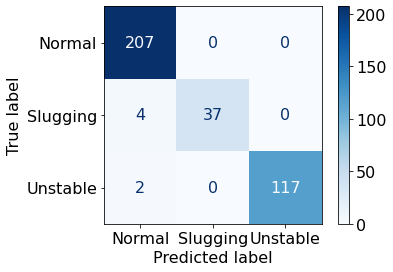

In [659]:
y_pred=lr.predict(X_testH1)
plt.rcParams.update({'font.size': 16})
cm = metrics.confusion_matrix(y_testH1, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ft_index)
disp.plot(cmap='Blues')
plt.savefig("CM_LR_PIH1.png", dpi=300) 

In [660]:
recall = metrics.recall_score(y_testH1, y_pred, average='macro')
precision = metrics.precision_score(y_testH1, y_pred, average='macro')
f1 = metrics.f1_score(y_testH1, y_pred, average='macro')
print('Recall:', recall,'Precision:', precision ,'F1:',f1)

Recall: 0.9618774339003894 Precision: 0.9906103286384976 F1: 0.975319219387016


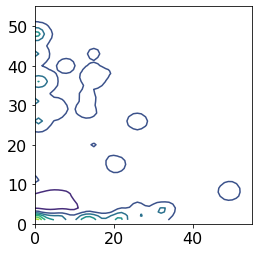

In [662]:
coef0 = lr.coef_[0].reshape([100,100])
coef1 = lr.coef_[1].reshape([100,100])
coef2 = lr.coef_[2].reshape([100,100])
coef_array = np.stack((coef0,coef1,coef2), axis=0)
coef_array.shape

X = np.arange(0, 100, 1)
Y = np.arange(0, 100, 1)
Z = coef_array[1]

X, Y = np.meshgrid(X, Y)

fig, ax = plt.subplots()
CS = ax.contour(X, 100-Y, Z)

ax.axis('square')
ax.set_xlim(0,55)
ax.set_ylim(0,55)

#ax.clabel(CS, inline=True, fontsize=10)
#ax.set_title('coefficients fror H1, class 2 (slugging)')
plt.savefig("Coeff_LR_PIH1.png", dpi=300) 

same but with random forests

In [663]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_trainH0, y_trainH0)

y_pred=clf.predict(X_testH0)
clf.score(X_testH0, y_testH0)

0.9945504087193461

In [664]:
recall = metrics.recall_score(y_testH0, y_pred, average='macro')
precision = metrics.precision_score(y_testH0, y_pred, average='macro')
f1 = metrics.f1_score(y_testH0, y_pred, average='macro')
print('Recall:', recall,'Precision:', precision ,'F1:',f1)

Recall: 0.9947089947089948 Precision: 0.9966666666666667 F1: 0.9956582914572865


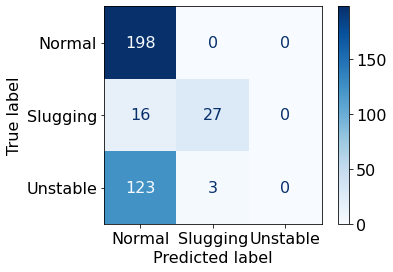

In [665]:
y_pred=lr.predict(X_testH0)
ft_index=['Normal', 'Slugging', 'Unstable']
plt.rcParams.update({'font.size': 16})
cm = metrics.confusion_matrix(y_testH0, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ft_index)
disp.plot(cmap='Blues')
plt.savefig("CM_RF_PIH0.png", dpi=300) 

In [666]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_trainH1, y_trainH1)

y_pred=clf.predict(X_testH1)
clf.score(X_testH1, y_testH1)

0.989100817438692

In [667]:
recall = metrics.recall_score(y_testH1, y_pred, average='macro')
precision = metrics.precision_score(y_testH1, y_pred, average='macro')
f1 = metrics.f1_score(y_testH1, y_pred, average='macro')
print('Recall:', recall,'Precision:', precision ,'F1:',f1)

Recall: 0.9781375965020155 Precision: 0.9856520152461276 F1: 0.9818323476023898


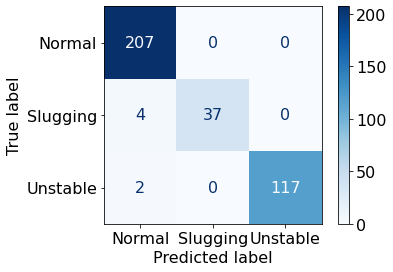

In [668]:
y_pred=lr.predict(X_testH1)
ft_index=['Normal', 'Slugging', 'Unstable']
plt.rcParams.update({'font.size': 16})
cm = metrics.confusion_matrix(y_testH1, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ft_index)
disp.plot(cmap='Blues')
plt.savefig("CM_RF_PIH1.png", dpi=300) 

Now, I try to combine the H0 and H1 diagram on a single one and then do regression on it. 

In [670]:
images_array_combined = imgs_array_H0 + imgs_array_H1

(1047, 10000)

In [672]:
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(images_array_combined, labels_total, test_size=0.35, random_state=242)

In [676]:
lr = LogisticRegression(max_iter=5000, multi_class="multinomial", solver='saga')
lr.fit(X_train_combined, y_train_combined)
lr.score(X_test_combined, y_test_combined)

0.9945504087193461

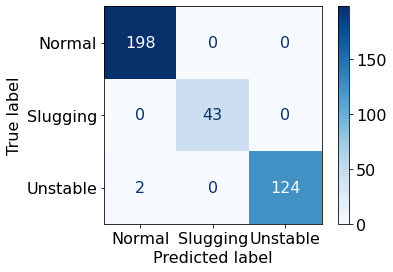

In [677]:
y_pred=lr.predict(X_test_combined)
ft_index=['Normal', 'Slugging', 'Unstable']
plt.rcParams.update({'font.size': 16})
cm = metrics.confusion_matrix(y_test_combined, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ft_index)
disp.plot(cmap='Blues')
plt.savefig("CM_RF_PIcomb.png", dpi=300)

In [678]:
recall = metrics.recall_score(y_test_combined, y_pred, average='macro')
precision = metrics.precision_score(y_test_combined, y_pred, average='macro')
f1 = metrics.f1_score(y_test_combined, y_pred, average='macro')
print('Recall:', recall,'Precision:', precision ,'F1:',f1)

Recall: 0.9947089947089948 Precision: 0.9966666666666667 F1: 0.9956582914572865


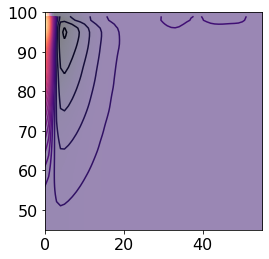

In [831]:
coef0 = lr.coef_[0].reshape([100,100])
coef1 = lr.coef_[1].reshape([100,100])
coef2 = lr.coef_[2].reshape([100,100])
coef_array = np.stack((coef0,coef1,coef2), axis=0)
coef_array.shape

X = np.arange(0, 100, 1)
Y = np.arange(0, 100, 1)
Z = coef_array[1]

X, Y = np.meshgrid(X, Y)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z*1000, 30, cmap='magma')

ax.axis('square')
ax.set_xlim(0,55)
ax.set_ylim(45,100)
#
#ax.clabel(CS, inline=True, fontsize=10)
#ax.set_title('coefficients fror H1, class 2 (slugging)')
ax.imshow(Z*1000, extent=[0, 55, 45, 100], origin='lower',
           cmap='magma', alpha=0.5)
#ax.colorbar()
plt.savefig("Coeff_LR_PIH1.png", dpi=300)

In [993]:
#plot_heatmap(coef_array[1][45:100], colorscale='plotly3', origin='upper', title=None, plotly_params=contours)
#plot_heatmap(coef_array[1][45:100], colorscale='plotly3', origin='upper', title=None)

tmp = coef_array[1][45:100]
data = tmp[:, 0:55]

import plotly.graph_objects as go
#data = coef_array[1]
     
fig = go.Figure(data =
     go.Contour(z = data, colorscale='plotly3'))
fig.update_yaxes( scaleanchor = "x", scaleratio = 1, )
 
fig.show()
fig.write_image("/Users/simo/repos/TDA-for-Slugging/images/LogReg_Coeff_Slug.pdf")

In [769]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train_combined, y_train_combined)

y_pred=clf.predict(X_test_combined)
clf.score(X_test_combined, y_test_combined)

0.9945504087193461

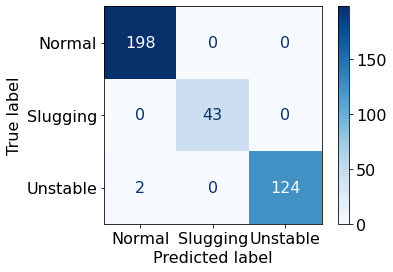

In [770]:
y_pred=lr.predict(X_test_combined)
ft_index=['Normal', 'Slugging', 'Unstable']
plt.rcParams.update({'font.size': 16})
cm = metrics.confusion_matrix(y_test_combined, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ft_index)
disp.plot(cmap='Blues')
plt.savefig("CM_RF_PIcomb.png", dpi=300)

#### Classification based on topological indicators

Re-computing the relevant topological indicators for normal operation time series.

In [1041]:
TE = TakensEmbedding(time_delay=85, dimension=9, stride=3)
homology_dimensions = (0, 1)
VRP = VietorisRipsPersistence(homology_dimensions=homology_dimensions)
PE = PersistenceEntropy()
PE_norm = PersistenceEntropy(normalize=True)
Betti = BettiCurve()

normal_point_cloud  = TE.fit_transform(normal_signals)
normal_diagrams = VRP.fit_transform(normal_point_cloud)
normal_entropy = PE.fit_transform(normal_diagrams)
normal_entropynorm = PE_norm.fit_transform(normal_diagrams)
normal_Betti = Betti.fit_transform(normal_diagrams)

In [1042]:
import statistics as stats

meanBettiH0 = []

for i in range(len(normal_Betti[:,0,0])):
    meanBettiH0.append(stats.mean(normal_Betti[i,0,:]))

meanBettiH1 = []

for i in range(len(normal_Betti[:,1,0])):
    meanBettiH1.append(stats.mean(normal_Betti[i,1,:]))


In [1043]:
pers_H1 = []
pers_H0 = []
max_pers_H0 = []
max_pers_H1 = []

for PersDiag in normal_diagrams: 
    for point in PersDiag:
        birth = point[0]
        death = point[1]
        dimension = point[2]
        persistence = abs(death - birth)
        pers_H0.extend([persistence] if dimension == 0 else [])
        pers_H1.extend([persistence] if dimension == 1 else [])
    max_pers_H0.append(np.amax(pers_H0))
    max_pers_H1.append(np.amax(pers_H1))
    pers_H0 = []
    pers_H1 = []

In [1044]:
tmp_entropies = normal_entropy
Entropy_H0 = []
Entropy_H1 = []
tmp_normalized = normal_entropynorm
Entropy_H0_norm = []
Entropy_H1_norm = []

for item in tmp_entropies:
    Entropy_H0.append(item[0])
    Entropy_H1.append(item[1])

for item in tmp_normalized:
    Entropy_H0_norm.append(item[0])
    Entropy_H1_norm.append(item[1])

In [1045]:
normal_features = np.stack([max_pers_H0,max_pers_H1,meanBettiH0,meanBettiH1,Entropy_H0_norm,Entropy_H1_norm ],axis=-1)

In [1046]:
TE = TakensEmbedding(time_delay=125, dimension=7, stride=3)

slugging_point_cloud  = TE.fit_transform(slugging_signals)
slugging_diagrams = VRP.fit_transform(slugging_point_cloud)
slugging_entropy = PE.fit_transform(slugging_diagrams)
slugging_entropynorm = PE_norm.fit_transform(slugging_diagrams)
slugging_Betti = Betti.fit_transform(slugging_diagrams)

In [1047]:
meanBettiH0 = []

for i in range(len(slugging_Betti[:,0,0])):
    meanBettiH0.append(stats.mean(slugging_Betti[i,0,:]))

meanBettiH1 = []
#medianBettiH1 = []
#modeBettiH1 = []

for i in range(len(slugging_Betti[:,1,0])):
    meanBettiH1.append(stats.mean(slugging_Betti[i,1,:]))

In [1048]:
pers_H0 = []
max_pers_H0 = []
max_pers_H1 = []

for PersDiag in slugging_diagrams: 
    for point in PersDiag:
        birth = point[0]
        death = point[1]
        dimension = point[2]
        persistence = abs(death - birth)
        pers_H0.extend([persistence] if dimension == 0 else [])
        pers_H1.extend([persistence] if dimension == 1 else [])
    max_pers_H0.append(np.amax(pers_H0))
    max_pers_H1.append(np.amax(pers_H1))
    pers_H0 = []
    pers_H1 = []

In [1049]:
tmp_entropies = slugging_entropy
Entropy_H0 = []
Entropy_H1 = []
tmp_normalized = slugging_entropynorm
Entropy_H0_norm = []
Entropy_H1_norm = []

for item in tmp_entropies:
    Entropy_H0.append(item[0])
    Entropy_H1.append(item[1])

for item in tmp_normalized:
    Entropy_H0_norm.append(item[0])
    Entropy_H1_norm.append(item[1])

In [1050]:
slugging_features = np.stack([max_pers_H0,max_pers_H1,meanBettiH0,meanBettiH1,Entropy_H0_norm,Entropy_H1_norm ],axis=-1)

In [1051]:
slugging_features.shape

(106, 6)

In [1052]:
TE = TakensEmbedding(time_delay=125, dimension=8, stride=3)

unstable_point_cloud  = TE.fit_transform(unstable_signals)
unstable_diagrams = VRP.fit_transform(unstable_point_cloud)
unstable_entropy = PE.fit_transform(unstable_diagrams)
unstable_entropynorm = PE_norm.fit_transform(unstable_diagrams)
unstable_Betti = Betti.fit_transform(unstable_diagrams)

In [1053]:
meanBettiH0 = []

for i in range(len(unstable_Betti[:,0,0])):
    meanBettiH0.append(stats.mean(unstable_Betti[i,0,:]))

meanBettiH1 = []

for i in range(len(unstable_Betti[:,1,0])):
    meanBettiH1.append(stats.mean(unstable_Betti[i,1,:]))

In [1054]:
pers_H0 = []
max_pers_H0 = []
max_pers_H1 = []

for PersDiag in unstable_diagrams: 
    for point in PersDiag:
        birth = point[0]
        death = point[1]
        dimension = point[2]
        persistence = abs(death - birth)
        pers_H0.extend([persistence] if dimension == 0 else [])
        pers_H1.extend([persistence] if dimension == 1 else [])
    max_pers_H0.append(np.amax(pers_H0))
    max_pers_H1.append(np.amax(pers_H1))
    pers_H0 = []
    pers_H1 = []

In [1055]:
tmp_entropies = unstable_entropy
Entropy_H0 = []
Entropy_H1 = []
tmp_normalized = unstable_entropynorm
Entropy_H0_norm = []
Entropy_H1_norm = []

for item in tmp_entropies:
    Entropy_H0.append(item[0])
    Entropy_H1.append(item[1])

for item in tmp_normalized:
    Entropy_H0_norm.append(item[0])
    Entropy_H1_norm.append(item[1])

In [1056]:
unstable_features = np.stack([max_pers_H0,max_pers_H1,meanBettiH0,meanBettiH1,Entropy_H0_norm,Entropy_H1_norm ],axis=-1)

In [1057]:
features_array = np.vstack([ normal_features, slugging_features, unstable_features])

In [1058]:
features_array.shape

(1047, 6)

In [1059]:
X_train_features, X_test_features, y_train_features, y_test_features = train_test_split(features_array, labels_total, test_size=0.35, random_state=49)

In [1060]:
zero = 0 
one = 0 
two = 0

for item in y_train_features:
    if item == 0:
        zero += 1
    elif item == 1:
        one += 1
    else :
        two += 1
print("TRAINING SET Total:", len(y_trainH1),"/ Normal:",zero,"Slugging:",one,"Unstable",two)

zero = 0 
one = 0 
two = 0
       
for item in y_test_features:
    if item == 0:
        zero += 1
    elif item == 1:
        one += 1
    else :
        two += 1
print("TEST SET Total:", len(y_testH1),"/ Normal:",zero,"Slugging:",one,"Unstable",two)

TRAINING SET Total: 680 / Normal: 397 Slugging: 69 Unstable 214
TEST SET Total: 367 / Normal: 200 Slugging: 37 Unstable 130


In [1061]:
lr = LogisticRegression(max_iter=5000, multi_class="multinomial", solver='saga')
lr.fit(X_train_features, y_train_features)
y_pred=lr.predict(X_test_features)
lr.score(X_test_features, y_test_features)

0.9291553133514986

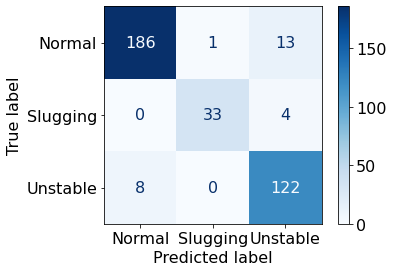

In [1062]:
cm = metrics.confusion_matrix(y_test_features, y_pred)
ft_index=['Normal', 'Slugging', 'Unstable']
plt.rcParams.update({'font.size': 16})
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ft_index)
disp.plot(cmap='Blues')
plt.savefig("CM_logreg_param.png", dpi=300) 

In [1063]:
recall = metrics.recall_score(y_test_features, y_pred, average='macro')
precision = metrics.precision_score(y_test_features, y_pred, average='macro')
f1 = metrics.f1_score(y_test_features, y_pred, average='macro')
print('Recall:', recall,'Precision:', precision ,'F1:',f1)

Recall: 0.9201178101178101 Precision: 0.9356829878728915 F1: 0.9269343661209927


In [1064]:
penalty='l1' 
C=1.0
lr = LogisticRegression(penalty=penalty, C=C, max_iter=5000, multi_class="multinomial", solver='saga')
lr.fit(X_train_features, y_train_features)
y_pred=lr.predict(X_test_features)
lr.score(X_test_features, y_test_features)

0.9291553133514986

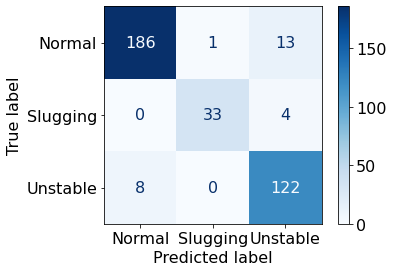

In [1065]:
cm = metrics.confusion_matrix(y_test_features, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ft_index)
disp.plot(cmap='Blues')

In [1066]:
recall = metrics.recall_score(y_test_features, y_pred, average='macro')
precision = metrics.precision_score(y_test_features, y_pred, average='macro')
f1 = metrics.f1_score(y_test_features, y_pred, average='macro')
print('Recall:', recall,'Precision:', precision ,'F1:',f1)

Recall: 0.9201178101178101 Precision: 0.9356829878728915 F1: 0.9269343661209927


I try optimizing the parameters (for the whole dataset, not only training or testing)

In [1067]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(max_iter=10000, multi_class="multinomial")
solvers = ['saga']
penalty = ['l1', 'l2']
c_values = [100, 100, 10, 1.0, 0.1, 0.001]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(features_array, labels_total)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.941752 using {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.941752 (0.027692) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.941752 (0.027692) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.941752 (0.027692) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.941752 (0.027692) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.941752 (0.027692) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.941752 (0.027692) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.941117 (0.027877) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.941117 (0.027877) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.934118 (0.026781) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.938574 (0.027935) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.629109 (0.014282) with: {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}
0.768223 (0.032058) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}


In [1068]:
penalty='l1' 
C=100
lr = LogisticRegression(penalty=penalty, C=C, max_iter=10000, multi_class="multinomial", solver='saga')
lr.fit(X_train_features, y_train_features)
y_pred=lr.predict(X_test_features)
lr.score(X_test_features, y_test_features)

0.9291553133514986

In [1069]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train_features, y_train_features)

y_pred=clf.predict(X_test_features)
clf.score(X_test_features, y_test_features)

0.9918256130790191

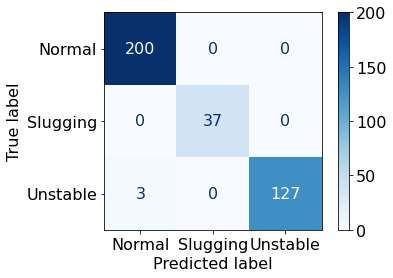

In [1070]:
cm = metrics.confusion_matrix(y_test_features, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ft_index)
disp.plot(cmap='Blues')
plt.savefig("CM_forest_param.png", dpi=300) 

In [1071]:
recall = metrics.recall_score(y_test_features, y_pred, average='macro')
precision = metrics.precision_score(y_test_features, y_pred, average='macro')
f1 = metrics.f1_score(y_test_features, y_pred, average='macro')
print('Recall:', recall,'Precision:', precision ,'F1:',f1)

Recall: 0.9923076923076923 Precision: 0.9950738916256158 F1: 0.9936275598381786


In [1075]:
ft_index=[
    'Max Persistence H0',
    'Max Persistence H1',
    'Betti mean H0',
    'Betti mean H1',
    #'Betti Med H0','Betti Med H1',
    #'Entropy H0','Entropy H1',
    'Entropy Norm H0',
    'Entropy Norm H1',
]
feature_imp = pd.Series(clf.feature_importances_,index=ft_index).sort_values(ascending=False)
feature_imp

Betti mean H0         0.302120
Max Persistence H1    0.273530
Max Persistence H0    0.157549
Entropy Norm H0       0.152339
Entropy Norm H1       0.074719
Betti mean H1         0.039743
dtype: float64

try instead to remove one feature at the time and see if it improves

In [162]:
def logscan(features_array):
    new_features_array = np.array([])
   # print(new_features_array.shape)
    for i in range(len(features_array[0])):
        new_features = np.delete(features_array, i, axis=-1)
        new_features_array = new_features_array.stack(new_features, axis=-1)
    return new_features_array

In [996]:
features_noNE = np.delete(features_array, [4,5], axis=-1)

In [1000]:
features_noNE[0]

array([ 2.53434241e-01,  8.30317736e-02,  1.21000000e+02,  0.00000000e+00,
        1.67916497e+00, -4.04376696e+00])

In [1001]:
features_noNE[0]

array([ 2.53434241e-01,  8.30317736e-02,  1.21000000e+02,  0.00000000e+00,
        1.67916497e+00, -4.04376696e+00])

In [450]:
X_train_features, X_test_features, y_train_features, y_test_features = train_test_split(features_array, labels_total, test_size=0.35, random_state=49)

In [1023]:
X_train_features_NoNE, X_test_features_NoNE, y_train_features_NoNE, y_test_features_NoNE = train_test_split(features_noNE, labels_total, test_size=0.35, random_state=41)

In [1024]:
lr = LogisticRegression(max_iter=5000, multi_class="multinomial", solver='saga')
lr.fit(X_train_features_NoNE, y_train_features_NoNE)
y_pred_NoNE=lr.predict(X_test_features_NoNE)
lr.score(X_test_features_NoNE, y_test_features_NoNE)

0.9291553133514986

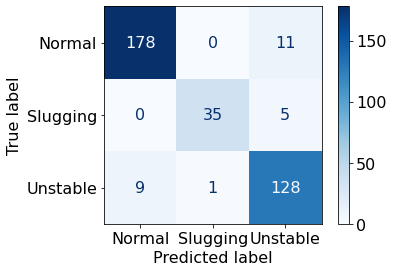

In [1025]:
cm = metrics.confusion_matrix(y_test_features_NoNE, y_pred_NoNE)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ft_index)
disp.plot(cmap='Blues')
plt.savefig("CM_LogReg_param.png", dpi=300) 

In [1027]:
recall = metrics.recall_score(y_test_features_NoNE, y_pred_NoNE, average='macro')
precision = metrics.precision_score(y_test_features_NoNE, y_pred_NoNE, average='macro')
f1 = metrics.f1_score(y_test_features_NoNE, y_pred_NoNE, average='macro')
print('Recall:', recall,'Precision:', precision ,'F1:',f1)

Recall: 0.9147783912276667 Precision: 0.9376609229550406 F1: 0.9252208535523204


In [1037]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train_features_NoNE, y_train_features_NoNE)

y_pred=clf.predict(X_test_features_NoNE)
clf.score(X_test_features_NoNE, y_test_features_NoNE)

0.9782016348773842

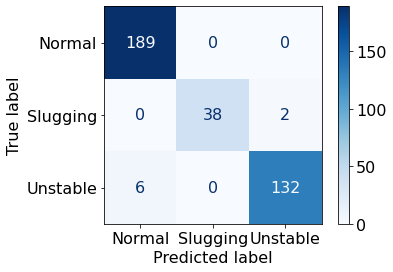

In [1038]:
cm = metrics.confusion_matrix(y_test_features_NoNE, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ft_index)
disp.plot(cmap='Blues')
plt.savefig("CM_forest_param.png", dpi=300) 

In [1036]:
recall = metrics.recall_score(y_test_features_NoNE, y_pred, average='macro')
precision = metrics.precision_score(y_test_features_NoNE, y_pred, average='macro')
f1 = metrics.f1_score(y_test_features_NoNE, y_pred_NoNE, average='macro')
print('Recall:', recall,'Precision:', precision ,'F1:',f1)

Recall: 0.971256038647343 Precision: 0.9864706631029655 F1: 0.9252208535523204


In [176]:
features_noAllE = np.delete(features_array, [6,7,8,9], axis=-1)

In [177]:
X_train_features_NoAllE, X_test_features_NoAllE, y_train_features_NoAllE, y_test_features_NoAllE = train_test_split(features_noAllE, labels, test_size=0.35, random_state=39)

In [179]:
lr = LogisticRegression(max_iter=5000, multi_class="multinomial", solver='saga')
lr.fit(X_train_features_NoAllE, y_train_features_NoAllE)
y_pred_NoAllE=lr.predict(X_test_features_NoAllE)
lr.score(X_test_features_NoAllE, y_test_features_NoAllE)
metrics.confusion_matrix(y_test_features_NoAllE, y_pred_NoAllE)

array([[209,   0,   4],
       [ 27,   0,  16],
       [  0,   0, 111]])

In [180]:
features_onlyPers = np.delete(features_array, [2,3,4,5,6,7,8,9], axis=-1)

In [181]:
features_onlyPers.shape

(1047, 2)

In [182]:
X_train_features_onlyPers, X_test_features_onlyPers, y_train_features_onlyPers, y_test_features_onlyPers = train_test_split(features_onlyPers, labels, test_size=0.35, random_state=39)

In [183]:
lr = LogisticRegression(max_iter=5000, multi_class="multinomial", solver='saga')
lr.fit(X_train_features_onlyPers, y_train_features_onlyPers)
y_pred_onlyPers=lr.predict(X_test_features_onlyPers)
lr.score(X_test_features_onlyPers, y_test_features_onlyPers)
metrics.confusion_matrix(y_test_features_onlyPers, y_pred_onlyPers)

array([[209,   0,   4],
       [ 43,   0,   0],
       [110,   0,   1]])

In [191]:
features_noPers = np.delete(features_array, [0,1], axis=-1)

In [192]:
features_noPers[0]

array([121.        ,   0.        ,   1.5       ,   0.        ,
         9.48154909,   4.1251318 ,   0.42601782,   0.26460929])

In [193]:
features_array[0]

array([2.53434258e+04, 8.30317773e+03, 1.21000000e+02, 0.00000000e+00,
       1.50000000e+00, 0.00000000e+00, 9.48154909e+00, 4.12513180e+00,
       4.26017824e-01, 2.64609294e-01])

In [194]:
X_train_features_noPers, X_test_features_noPers, y_train_features_noPers, y_test_features_noPers = train_test_split(features_noPers, labels, test_size=0.35, random_state=39)

In [195]:
lr = LogisticRegression(max_iter=5000, multi_class="multinomial", solver='saga')
lr.fit(X_train_features_noPers, y_train_features_noPers)
y_pred_noPers=lr.predict(X_test_features_noPers)
lr.score(X_test_features_noPers, y_test_features_noPers)
metrics.confusion_matrix(y_test_features_noPers, y_pred_noPers)

array([[208,   1,   4],
       [  8,   5,  30],
       [  2,   0, 109]])

In [196]:
features_betti = np.delete(features_array, [0,1,4,5,6,7,8,9], axis=-1)
features_betti.shape

(1047, 2)

In [197]:
X_train_features_betti, X_test_features_betti, y_train_features_betti, y_test_features_betti = train_test_split(features_betti, labels, test_size=0.35, random_state=39)

In [198]:
lr = LogisticRegression(max_iter=5000, multi_class="multinomial", solver='saga')
lr.fit(X_train_features_betti, y_train_features_betti)
y_pred_betti=lr.predict(X_test_features_betti)
lr.score(X_test_features_betti, y_test_features_betti)
metrics.confusion_matrix(y_test_features_betti, y_pred_betti)

array([[198,   0,  15],
       [  8,   0,  35],
       [  4,   0, 107]])